In [1]:
!python --version


Python 3.11.13


In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [3]:
import pandas as pd

# Load dataset directly from the web
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)

# Display first 5 rows
print(df.head())


         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8


In [4]:
# Check basic info
print(df.info())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Basic statistics
print("\nSummary statistics:\n", df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB
None

Missing values:
 Date    0
Temp    0
dtype: int64

Summary statistics:
               Temp
count  3650.000000
mean     11.177753
std       4.071837
min       0.000000
25%       8.300000
50%      11.000000
75%      14.000000
max      26.300000


In [5]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year, Month, Day (Optional, but useful later)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

print(df.head())


        Date  Temp  Year  Month  Day
0 1981-01-01  20.7  1981      1    1
1 1981-01-02  17.9  1981      1    2
2 1981-01-03  18.8  1981      1    3
3 1981-01-04  14.6  1981      1    4
4 1981-01-05  15.8  1981      1    5


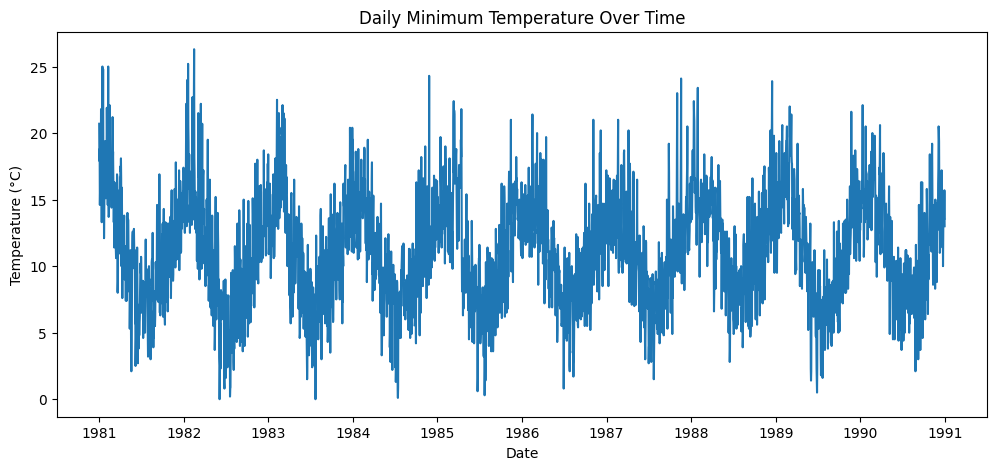

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.lineplot(x='Date', y='Temp', data=df)
plt.title("Daily Minimum Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()


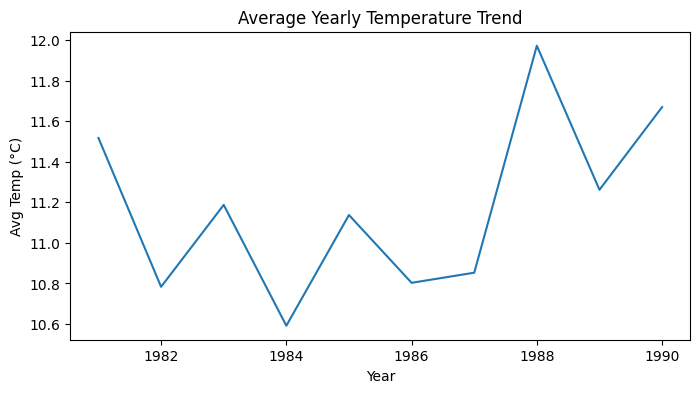

In [7]:
yearly_avg = df.groupby('Year')['Temp'].mean()
plt.figure(figsize=(8,4))
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values)
plt.title("Average Yearly Temperature Trend")
plt.xlabel("Year")
plt.ylabel("Avg Temp (°C)")
plt.show()


In [8]:
# Create lag feature (Temp of previous day)
df['Temp_prev_day'] = df['Temp'].shift(1)

# Drop the first row (because it will have NaN after shifting)
df = df.dropna()

print(df.head())


        Date  Temp  Year  Month  Day  Temp_prev_day
1 1981-01-02  17.9  1981      1    2           20.7
2 1981-01-03  18.8  1981      1    3           17.9
3 1981-01-04  14.6  1981      1    4           18.8
4 1981-01-05  15.8  1981      1    5           14.6
5 1981-01-06  15.8  1981      1    6           15.8


In [9]:
# Features (X) and Target (y)
X = df[['Temp_prev_day']]
y = df['Temp']


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (2919, 1)
Testing data size: (730, 1)


In [11]:
from sklearn.linear_model import LinearRegression

# Initialize and train
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [12]:
# Predict on test set
y_pred = model.predict(X_test)

# Show first 10 predicted vs actual values
comparison = pd.DataFrame({'Actual': y_test.values[:10], 'Predicted': y_pred[:10]})
print(comparison)


   Actual  Predicted
0    14.3  13.387856
1    17.4  13.540456
2    18.5  15.905752
3    16.8  16.745051
4    11.5  15.447953
5     9.5  11.404059
6    12.2   9.878061
7    15.7  11.938158
8    16.3  14.608654
9    13.6  15.066453


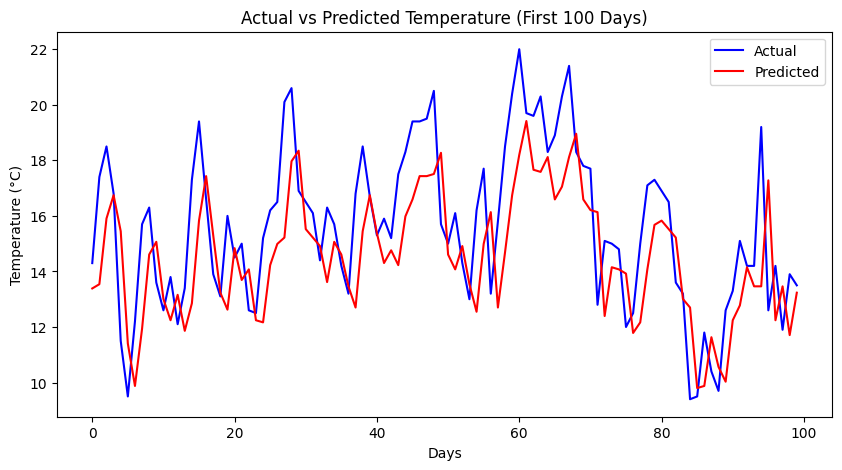

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label="Actual", color='blue')
plt.plot(y_pred[:100], label="Predicted", color='red')
plt.title("Actual vs Predicted Temperature (First 100 Days)")
plt.xlabel("Days")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 1.90
Root Mean Square Error (RMSE): 2.38


In [17]:
import pandas as pd

future_days = 7
last_temp = df['Temp'].iloc[-1]

future_predictions = []

for i in range(future_days):
    # Pass as DataFrame with the same feature name
    next_temp = model.predict(pd.DataFrame({'Temp_prev_day': [last_temp]}))[0]
    future_predictions.append(next_temp)
    last_temp = next_temp

print("Predicted temperatures for next 7 days:")
print(future_predictions)


Predicted temperatures for next 7 days:
[np.float64(12.548557212510868), np.float64(12.20410688763403), np.float64(11.941291688021131), np.float64(11.74076399459461), np.float64(11.587761596368832), np.float64(11.47102094343045), np.float64(11.381947960218975)]


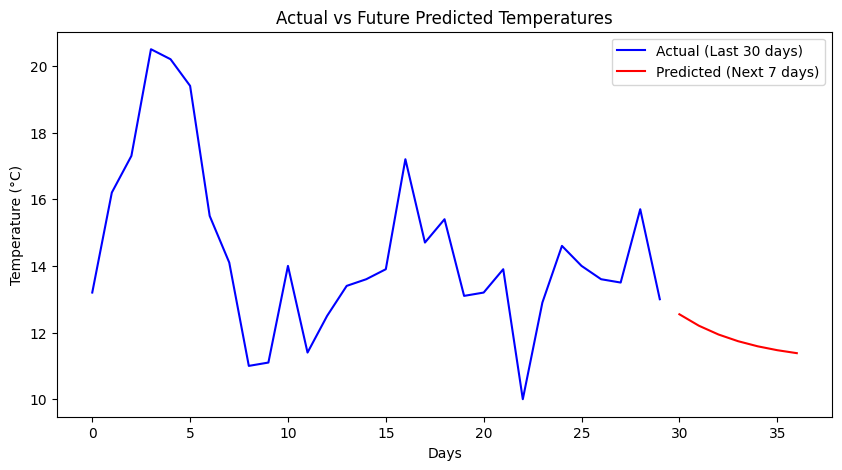

In [18]:
import numpy as np

# Combine last 30 actual temps with future predictions
last_30_actual = df['Temp'].iloc[-30:].values
combined = np.concatenate([last_30_actual, future_predictions])

plt.figure(figsize=(10,5))
plt.plot(range(len(last_30_actual)), last_30_actual, label="Actual (Last 30 days)", color='blue')
plt.plot(range(len(last_30_actual), len(combined)), future_predictions, label="Predicted (Next 7 days)", color='red')
plt.title("Actual vs Future Predicted Temperatures")
plt.xlabel("Days")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()
